<a href="https://colab.research.google.com/github/kyliefromm/Mission2/blob/main/Modeling_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [1]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df:
  for i, value in df[col].items():
    df.at[i, col] = f'{i}/{col}'

df

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


### Regression Questions

The conceptual questions (which do not require coding) are skipped in this notebook

In [2]:
# Question 1: Conceptual question; answer in MyEducator. Nothing to do here

In [3]:
# Question 2: Conceptual question; answer in MyEducator. Nothing to do here

In [4]:
# Question 3: Conceptual question; answer in MyEducator. Nothing to do here

In [5]:
# Question 4: Conceptual question; answer in MyEducator. Nothing to do here 

In [6]:
# Question 5: Conceptual question; answer in MyEducator. Nothing to do here

In [7]:
# Question 6: Download the StudentsPerformance.csv dataset that is provided with this exam. Import it into a DataFrame. Print a list of column names and their associated data types. Which columns would make sense to predict as a label in an MLR?
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
performance = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv")
print(performance.dtypes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [8]:
# Question 7: Drop any rows that contain null values in any column using .dropna(). Use the statsmodels package to create an MLR/OLS model to predict math score as a function of the reading score and writing score. Do not split the data; use the entire dataset for training. Allow the y-intercept to vary.
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

performance.dropna(axis = 0, how = 'any', inplace=True)

y = performance['math score']
X = performance.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['math score'])

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

# Which feature best predicts their math score?



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          2.25e-243
Time:                        06:32:40   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
reading score     0.6013      0.063      9.538

In [9]:
# Question 8: In the original DataFrame convert each of the non-numeric features into dummy codes. Generate an OLS/MLR model (using the statsmodels package) to predict math score. However, do not include either reading score or writing score as features; only include those dummy codes created from the categorical features. Do not split the data; use the entire dataset for training. Print the results summary.
performance1 = performance.copy()
for col in performance1.columns: 
  if col != 'math score':
    if not pd.api.types.is_numeric_dtype(performance1[col]):
      performance1 = pd.get_dummies(performance1, columns=[col], prefix=col)
performance1.head()

performance1.drop(["reading score", "writing score"], axis = 1, inplace = True)

performance1.dropna(axis = 0, how = 'any', inplace=True)

y = performance1['math score']
X = performance1.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['math score'])

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())
# Do test preparation courses improve math scores?


                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     28.09
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           2.92e-55
Time:                        06:32:40   Log-Likelihood:                -3990.4
No. Observations:                1000   AIC:                             8007.
Df Residuals:                     987   BIC:                             8071.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [10]:
# Question 9: Generate OLS/MLR models to predict writing scores and reading scores using the same set of features. Similarly, drop the other two score features from each score model you create. For example, predict reading score, but do not include math score or writing score as features. Do not split the data; use the entire dataset for training. Print the results of each model summary. 
performance2 = performance.copy()
for col in performance2.columns: 
  if col != 'reading score':
    if not pd.api.types.is_numeric_dtype(performance2[col]):
      performance2 = pd.get_dummies(performance2, columns=[col], prefix=col)
performance2.head()

performance2.drop(["math score", "writing score"], axis = 1, inplace = True)

performance2.dropna(axis = 0, how = 'any', inplace=True)

y = performance2['reading score']
X = performance2.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['reading score'])

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())
# Which score (reading, writing, or math) is most accurately predicted?

performance3 = performance.copy()
for col in performance3.columns: 
  if col != 'writing score':
    if not pd.api.types.is_numeric_dtype(performance3[col]):
      performance3 = pd.get_dummies(performance3, columns=[col], prefix=col)
performance3.head()

performance3.drop(["math score", "reading score"], axis = 1, inplace = True)

performance3.dropna(axis = 0, how = 'any', inplace=True)

y = performance3['writing score']
X = performance3.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['writing score'])

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:          reading score   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     24.13
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.15e-47
Time:                        06:32:40   Log-Likelihood:                -3970.8
No. Observations:                1000   AIC:                             7968.
Df Residuals:                     987   BIC:                             8031.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [11]:
# Question 10: Using the last model you created to predict math score (which includes all of the dummy codes), what is the predicted math score of a child who is female, race/ethnicity_group C, parental level of education_some college, gets a reduced lunch, and has not taken a test preparation course? Print the predicted value.

performance1['predicted'] = results.fittedvalues
performance1

# diff = []

# for row in performance1.intertuples():
#   diff.append(abs(row[8]-row[7]))

# performance1['diff'] = diff
# performance1


,math score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,predicted
0,72,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,75.371094
1,69,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,82.062500
2,90,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,77.058594
3,47,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,52.695312
4,76,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,62.367188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,91.054688
996,62,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,49.070312
997,59,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,68.765625
998,68,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,85.699219


### Classification


In [12]:
# Question 11: Conceptual question; answer in MyEducator. Nothing to do here

In [13]:
# Question 12: Conceptual question; answer in MyEducator. Nothing to do here

In [14]:
# Question 13: Conceptual question; answer in MyEducator. Nothing to do here

In [15]:
# Question 14: Conceptual question; answer in MyEducator. Nothing to do here

In [16]:
#  Question 15: Import all needed packages for classification modeling, splitting the data, and calculating fit metrics. Import the Lending Club dataset found at: http://www.ishelp.info/data/lc_xs.csv. Alternatively, if the server is down, you can also download this data file from the MyEducator assignment description. 

# How many records are in the dataset?
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

loans = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/lc_xs.csv")
print(loans.shape)
loans


(20951, 35)


,loan_status,loan_status_numeric,loan_amnt,issue_d,term,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,...,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti,grade,sub_grade
0,Current,5,25000,2016-12-01,60 months,13.99,581.58,14630.570000,8353.44,6277.13,...,1.0,7165,72.4,409.0,226630.0,31.0,9900.0,9.07,C,C3
1,Charged Off,0,8000,2016-05-01,36 months,8.39,252.14,5384.790000,3749.64,785.15,...,0.0,10077,36.9,0.0,28185.0,45.0,27300.0,21.99,B,B1
2,Charged Off,0,35000,2018-05-01,60 months,18.45,897.37,2763.860000,1094.39,1669.47,...,0.0,5831,48.6,0.0,12197.0,22.0,12000.0,15.63,D,D2
3,Fully Paid,6,15000,2017-04-01,36 months,11.39,493.86,15762.912745,15000.00,762.91,...,0.0,10854,47.4,0.0,131128.0,32.0,22900.0,23.99,B,B3
4,Current,5,12500,2018-11-01,36 months,6.46,382.89,1132.970000,951.90,181.07,...,1.0,12731,43.6,0.0,55713.0,34.0,29200.0,9.07,A,A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20946,Current,5,27600,2017-04-01,36 months,16.99,983.88,21691.640000,15140.44,6452.82,...,0.0,34879,80.4,0.0,45118.0,21.0,43400.0,25.60,D,D1
20947,Current,5,10000,2017-12-01,60 months,13.59,230.57,3212.880000,1769.04,1443.84,...,0.0,2756,22.6,0.0,2996.0,8.0,12200.0,7.31,C,C2
20948,Current,5,6400,2017-07-01,36 months,7.07,197.82,3753.550000,3208.98,544.57,...,0.0,4884,14.5,0.0,8170.0,13.0,33700.0,14.80,A,A2
20949,Current,5,35000,2018-09-01,36 months,11.06,1146.85,5691.240000,4198.01,1493.23,...,0.0,55785,48.8,188.0,76626.0,31.0,114400.0,31.31,B,B3


In [17]:
# Question 16: Run the code below. If you named your DataFrame something other than 'df', then be sure to change 'df' to whatever your DataFrame is named before running the code.

# Based on the results, do you believe that Lending Club is doing a decent job of determining who will pay back their loans?

loans['loan_status'].value_counts()


Current               13268
Fully Paid             5484
Charged Off            1708
Late (31-120 days)      313
In Grace Period         106
Late (16-30 days)        72
Name: loan_status, dtype: int64

In [18]:
# QUESTION 17: Drop the features: loan_status_numeric, issue_d, title, emp_title, emp_length, earliest_cr_line, mths_since_last_delinq, mths_since_last_record, sub_grade. Pseudocode:
#      df.drop(columns=[name, name, ..., name], inplace=True)
loans1 = loans.drop(columns=['loan_status_numeric', 'issue_d', 'title', 'emp_title', 'emp_length', 'earliest_cr_line', 'mths_since_last_delinq','mths_since_last_record', 'sub_grade'], inplace=True)
# Since customers who are Current, In Grace Period, Late (16-30 days), and Late (31-120 days) have not finished their loan, drop all records except for those which are Fully Paid or Charged Off. Pseudocode: 
#      df.loc[(df['column_name'] == A) or (df['column_name'] == B)]
loans1 = loans.loc[(loans['loan_status']== 'Fully Paid') | (loans['loan_status']== 'Charged Off')]
# Drop any rows containing null data using the command: df.dropna(inplace=True). 
loans1.dropna(inplace=True)
# Finally, create dummy codes for all remaining categorical features (but not for the label loan_status)
for col in loans1.columns: 
  if col != 'loan_status':
    if not pd.api.types.is_numeric_dtype(loans1[col]):
      loans1 = pd.get_dummies(loans1, columns=[col], prefix=col)

# Print out the first five records of the resulting DataFrame. How many columns are left after completing each of these tasks?
print(loans1.head())
print(loans1.shape)



    loan_status  loan_amnt  int_rate  installment   total_pymnt  \
1   Charged Off       8000      8.39       252.14   5384.790000   
2   Charged Off      35000     18.45       897.37   2763.860000   
3    Fully Paid      15000     11.39       493.86  15762.912745   
6    Fully Paid      27250     17.27       975.21  27961.440003   
10  Charged Off      30000      9.44       629.18  10403.600000   

    total_rec_prncp  total_rec_int  total_rec_late_fee  annual_inc  \
1           3749.64         785.15                 0.0     59000.0   
2           1094.39        1669.47                 0.0     50000.0   
3          15000.00         762.91                 0.0     98000.0   
6          27250.00         711.44                 0.0    120000.0   
10          4499.17        2406.08                 0.0     60000.0   

    acc_now_delinq  ...  verification_status_Not Verified  \
1              0.0  ...                                 1   
2              0.0  ...                               

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [19]:
# Question 18: Set the y and X datasets assuming that loan_status will be the label. Print the first 5 records of X
y = loans1['loan_status']
X = loans1.drop(columns=['loan_status'])
#X = X.select_dtypes(np.number)
X.head()

,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,delinq_2yrs,...,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
1,8000,8.39,252.14,5384.790000,3749.64,785.15,0.0,59000.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
2,35000,18.45,897.37,2763.860000,1094.39,1669.47,0.0,50000.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
3,15000,11.39,493.86,15762.912745,15000.00,762.91,0.0,98000.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,0
6,27250,17.27,975.21,27961.440003,27250.00,711.44,0.0,120000.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
10,30000,9.44,629.18,10403.600000,4499.17,2406.08,0.0,60000.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0


In [20]:
# Question 19: Split the data using a 50/50 split and random seed = 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12345)


# Next, train a Decision Tree Classifier model using a random_state=12345 and fit the model with the appropriate data set
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


# Print the Accuracy score using the .score() method of the Decision Tree Classifier model object. Pass in the appropriate data into .score() to generate the accuracy score. What is that score? Copy and paste the entire result
clf.score(X_test, y_test)


0.9824561403508771

In [21]:
# Question 20: Predict the labels for test dataset and display them in a dataframe along with the actual values. Print only the LAST 10 records. Which row index was predicted incorrectly in these last 10 records? Enter the row index number. NOTE: if this row is the third row from the top, do not enter '3', enter the actual row index number which represents the original row number in the complete DataFrame.
output_loan = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_loan.tail(10)

,Actual,Predicted
20875,Charged Off,Charged Off
3411,Charged Off,Charged Off
3311,Charged Off,Fully Paid
11648,Fully Paid,Fully Paid
20422,Fully Paid,Fully Paid
20190,Charged Off,Charged Off
20358,Fully Paid,Fully Paid
13148,Charged Off,Charged Off
6668,Charged Off,Charged Off
19710,Fully Paid,Fully Paid


## Clustering


In [22]:
# Question 21: Conceptual question; answer in MyEducator. Nothing to do here.

In [23]:
# Question 22: Conceptual question; answer in MyEducator. Nothing to do here.

In [24]:
# Question 23: Conceptual question; answer in MyEducator. Nothing to do here.

In [25]:
# Question 24: Conceptual question; answer in MyEducator. Nothing to do here.

In [26]:
# Question 25: Conceptual question; answer in MyEducator. Nothing to do here.

In [27]:
# Question 26: Import the necessary libraries to perform your Clustering analysis. Once again, use the Lending Club dataset (lc_xs.csv) but reimport a fresh copy into a DataFrame

# Next, remove all columns that are not numeric. Once quick way to do that is using the np.number method of the numpy package: df.select_dtypes(np.number)

# Also, remove loan_status_numeric from the DataFrame since that is typically considered a label and we are going to generate our own cluster/label.

# After completing the prior step, remove all rows that contain any null values (see the example code given to you above).

# Finally, scale the remaining DataFrame using a MinMaxScalar().

# Print the first 5 records. What is the row index number of the second row?

import pandas as pd
import plotly.express as px
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial import distance as sdist

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/lc_xs.csv")

og_df = df.select_dtypes(np.number)
og_df.drop(columns=['loan_status_numeric'], inplace=True)
og_df.dropna(axis = 0, how = 'any', inplace=True)

from sklearn import preprocessing
          # Min-Max Normalization
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(og_df), columns=og_df.columns)
df_minmax.head()



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,delinq_2yrs,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti
0,0.615385,0.338006,0.406298,0.332336,0.208836,0.362664,0.000000,0.078689,0.0,0.000000,...,0.572650,0.150,0.0,0.020624,0.708415,0.003575,0.153101,0.329268,0.026799,0.087799
1,0.435897,0.260125,0.272744,0.327031,0.237382,0.283325,0.000000,0.073189,0.0,0.111111,...,0.547009,0.175,0.0,0.043504,0.802348,0.000000,0.051893,0.463415,0.051558,0.280700
2,0.102564,0.240654,0.099272,0.123910,0.125000,0.031156,0.000000,0.048792,0.0,0.111111,...,0.675214,0.350,0.0,0.022434,0.732877,0.000000,0.056422,0.304878,0.028255,0.246589
3,0.102564,0.288941,0.101460,0.019922,0.017672,0.017134,0.000000,0.039034,0.0,0.111111,...,0.615385,0.275,0.0,0.014939,0.409980,0.003610,0.031795,0.231707,0.034081,0.393316
4,0.076923,0.104361,0.070148,0.096487,0.100000,0.018090,0.142694,0.117102,0.0,0.000000,...,0.452991,0.350,0.0,0.032425,0.236791,0.000000,0.255211,0.317073,0.133702,0.128535


ValueError: ignored

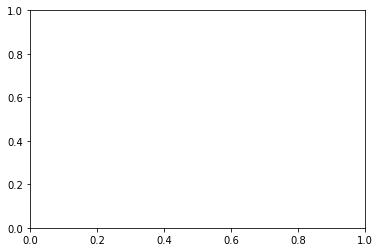

In [28]:
# Question 27: Next, let's perform a Silhouette analysis and see if it agrees with the CH criterion. Once again, calculate a silhouette score for KMeans models with n number of clusters = 2 though 20 with a random seed = 12345. Plot the results. What is the optimal number of clusters?
from sklearn.metrics import silhouette_score
          
si_score = []
for n in range(2, 21):
  kmeans = KMeans(n, random_state=12345).fit(og_df)
si_score.append(silhouette_score(og_df, kmeans.labels_))
          
plt.plot(range(2, 21), si_score, 'bx-')
plt.xlabel('number of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Optimal Number of Clusters')
plt.text(11, .14, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In [ ]:
# Question 28: Generate a KMeans model using two clusters and a random seed of 12345. Add the assigned clusters as a new column in DataFrame.
kmeans = KMeans(2, random_state=12345).fit(df)
          
# Add assigned clusters to a new DataFrame
df_wcluster = df.copy()
df_wcluster['cluster'] = kmeans.labels_
df_wcluster.head()
# Which cluster has the most assigned cases? 


In [ ]:
# Question 29: Create a new DataFrame that displays the means of each feature seperately for the cases assigned both clusters (just like the example in the book). 

# Which features played the largest role in determining clusters? Copy and paste the full name below exactly as it appears with no leading or trailing spaces.
output_df = pd.DataFrame({'C0_means': df_wcluster[df_wcluster.cluster == 0].mean(), 'C1_means': df_wcluster[df_wcluster.cluster == 1].mean()})
output_df['diff'] = abs(output_df['C0_means'] - output_df['C1_means'])
output_df.drop(['cluster']).sort_values(by=['diff'], ascending=False)


In [ ]:
# Question 30: What is the predicted/assigned cluster for a new loan with the following values:? [0.9, 0.33, 0.34, 0.30, 0.25, 0.17, 1.0, 0.18, 0.0, 0.0, 0.0, 0.37, 0.54, 0.17, 0.04, 0.08, 0.70, 1.0, 0.02, 0.23, 0.12, 0.05]
 prediction = kmeans.predict([[0.9, 0.33, 0.34, 0.30, 0.25, 0.17, 1.0, 0.18, 0.0, 0.0, 0.0, 0.37, 0.54, 0.17, 0.04, 0.08, 0.70, 1.0, 0.02, 0.23, 0.12, 0.05]])[0]